In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Data: Seoul Bike Sharing Demand Data Set
Data Source: https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand

Note: Originally an error was being thrown by read_csv, but removing the degree symbol from the temperature fields fixed this.

In [2]:
bikes = pd.read_csv('./data/SeoulBikeData.csv')
bikes.head(10)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [3]:
print(bikes.shape)

(8760, 14)


Get a count of bike rentals for each day using the Pandas groupby function with a sum.

In [4]:
bike_counts = bikes.groupby(['Date']).sum().reset_index()[['Date','Rented Bike Count']]

Similary, uses Pandas' groupby to apply the mean to the temperature. Samples in this dataset are collect for each hour, so this query will return the hourly temperature for each day in the dataset.

In [5]:
temperatures = bikes.groupby(['Date']).mean().reset_index()[['Date','Temperature(C)']]

Merge the two datasets together using the Date field, and write it to a csv file.

In [6]:
data = bike_counts.merge(temperatures, on='Date', how='inner')
data.columns = ['Date','BikeCount','Temperature']
data.to_csv('./data/seoul_bike_counts_vs_temperature.csv')
data.head()

,Date,Rented Bike Count,Temperature(C)
0,01/01/2018,4290,-1.283333
1,01/02/2018,5377,-3.866667
2,01/03/2018,5132,0.450000
3,01/04/2018,17388,15.183333
4,01/05/2018,26820,20.341667


Finally, let's have a quick look at what the data will look liek in a scatter plot.

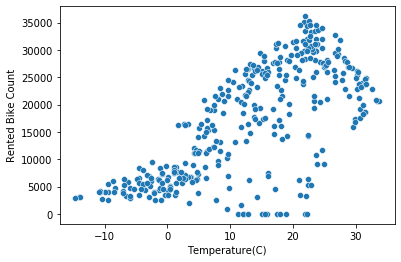

In [7]:
sns.scatterplot(data=data, x='Temperature(C)', y='Rented Bike Count')
plt.show()